In [1]:
!pip install scikit-learn pandas numpy matplotlib seaborn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.0 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 9.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 4.7 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 4.8 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load dataset
df = pd.read_csv('spam_ham_dataset.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# Check for missing values
df.isnull().sum()

# Display column names and types
df.info()

# Check the distribution of spam vs non-spam emails
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


label
ham     3672
spam    1499
Name: count, dtype: int64

In [6]:
# Convert the labels (spam, ham) to numerical values (0 for ham, 1 for spam)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Convert the text column (e.g., 'text') into numerical features using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()

# Target variable
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 98.65%


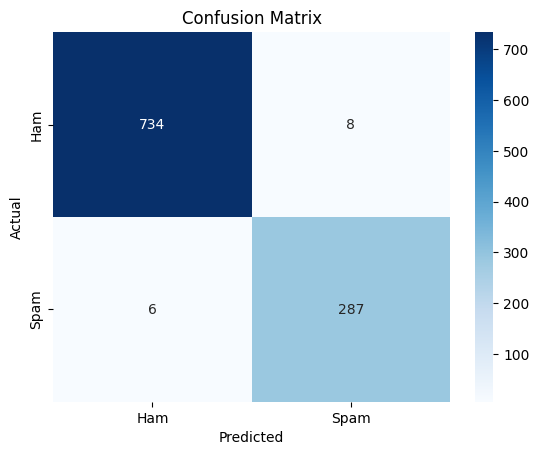

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       742
        Spam       0.97      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.99      0.99      0.99      1035



In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
print(report)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithms
}

# Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy after tuning: {accuracy_tuned * 100:.2f}%')
